In [10]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns


#from mainP import Main

#mn = Main()
#file = pd.read_excel ('./Data/Data_Collection_missing.xlsx')
#file = pd.read_excel ('./Data/mice_file.xlsx')
file = pd.read_excel ('./Data/interpolate1.xlsx')

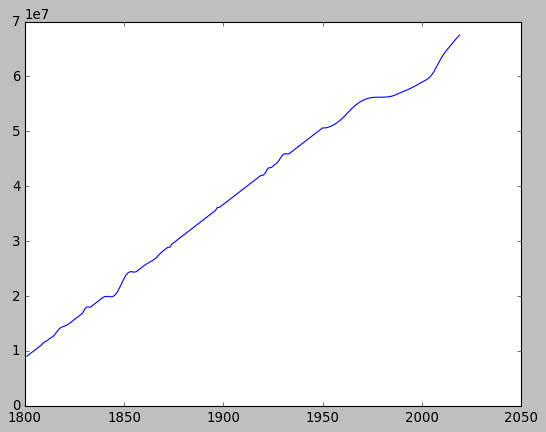

In [11]:
pg = pd.DataFrame(file, columns=['Population growth'])
migr  = pd.DataFrame(file, columns=['Migration'])
pop = pd.DataFrame(file, columns=['population'])
year = pd.DataFrame(file, columns=['year'])
plt.style.use('classic')
plt.plot(year, pop)

plt.show()

In [3]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'data1': range(6),
                   'data2': rng.randint(0, 10, 6)},
                   columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [22]:


class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args
        
    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)
    
    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

In [23]:
def norm_by_data2(x):
    # x is a DataFrame of group values
    x['data1'] /= x['data2'].sum()
    return x

display('df', "df.groupby('key').apply(norm_by_data2)")

KeyError: 'key'

KeyError: 'key'

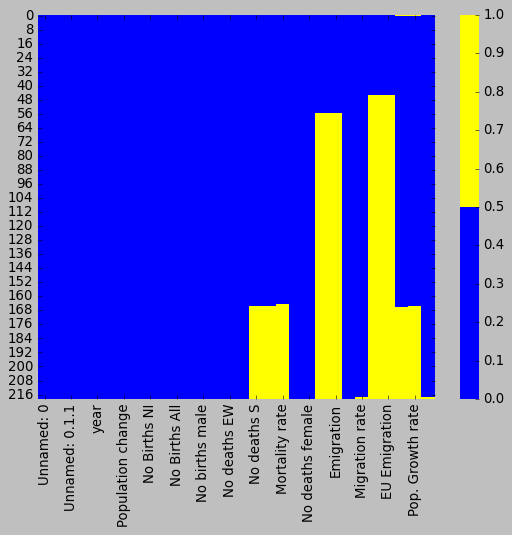

In [12]:
df = pd.DataFrame(file)
cols = df.columns
colours = ['blue', 'yellow'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [71]:
from impyute.imputation.cs import mice

df = pd.DataFrame(file)

impute = mice(df.values)

impute
df = pd.DataFrame(impute, columns=['year','population', 'Population change', 'No Briths E&W', 'No Births NI','No Births S','No Births All', 'Fertility Rates %','No births male','No births female','No deaths EW','No deaths NI','No deaths S','All Deaths','Mortality rate','No deaths male','No deaths female','Imigration','Emigration','Migration','Migration rate','EU Imgration','EU Emigration','Population growth','Pop. Growth rate','Population growth all','cos'])

In [72]:
df.to_excel('./Data/mice_file.xlsx')



In [3]:
df_inter = pd.DataFrame(file,
                        columns=file.columns).interpolate(method='polynomial', order=5)


In [4]:
df_inter.to_excel('./Data/interpolate1.xlsx')